In [2]:
import pandas as pd
from Bio import SeqIO
from matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter

In [3]:
sns.set()

In [4]:
PATH = '/home/parazit/ml_virus_host/v2.0/fixing_families/'
path = '/home/parazit/ml_virus_host/v2.0/'
path_matrix = '/home/parazit/ml_virus_host/v2.0/fixing_families/'

# Pairwise distances matrix

In [32]:
matrix = pd.read_csv(PATH+'Caliciviridae_dist.csv', sep=',')
matrix['Dist'] = [x/10**(len(str(x))-2) for x in matrix['Dist']]
matrix['Species 2'] = matrix['Species 1']
matrix['Species 1'] = matrix.index
matrix.reset_index(inplace=True, drop=True)
matrix.to_csv(PATH+'Caliciviridae_dist.csv', sep=',', index=False)

In [13]:
matrix = pd.read_csv(PATH+'Picornaviridae_dist.csv', sep=',')
matrix.head()

,Species 1,Species 2,Dist
0,AF162711 AF162711 Echovirus 30 strain Bastiann...,HM185056 HM185056 Human echovirus 6 strain Ech...,0.194
1,AF162711 AF162711 Echovirus 30 strain Bastiann...,AM235750 AM235750 Human parechovirus 4 complet...,0.521
2,HM185056 HM185056 Human echovirus 6 strain Ech...,AM235750 AM235750 Human parechovirus 4 complet...,0.511
3,AF162711 AF162711 Echovirus 30 strain Bastiann...,NC 010415 NC 010415 Enterovirus J strain 1631 ...,0.276
4,HM185056 HM185056 Human echovirus 6 strain Ech...,NC 010415 NC 010415 Enterovirus J strain 1631 ...,0.278


Coronaviridae
[0.46, 0.426, 0.457, 0.458, 0.391, 0.453, 0.049, 0.461, 0.427, 0.462]


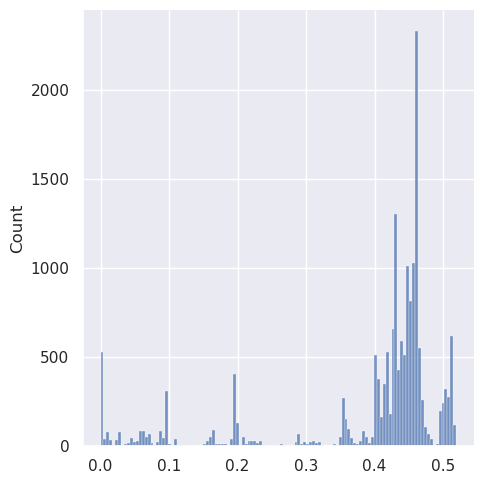

Picornaviridae
[0.194, 0.521, 0.511, 0.276, 0.278, 0.506, 0.133, 0.198, 0.508, 0.275]


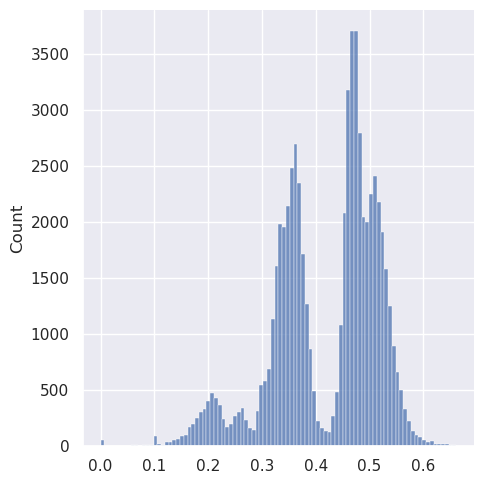

Caliciviridae
[0.328, 0.384, 0.4, 0.393, 0.386, 0.24, 0.38, 0.382, 0.27, 0.259]


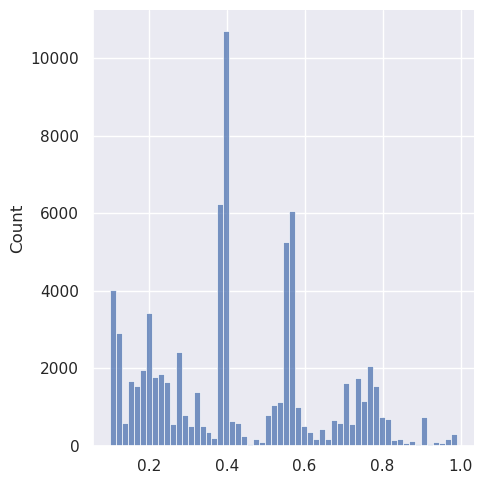

In [33]:
for fam in ['Coronaviridae', 'Picornaviridae', 'Caliciviridae']:
    matrix = pd.read_csv(PATH+fam+'_dist.csv', sep=',')
    print(fam)
    print(list(matrix['Dist'])[:10])
    sns.displot(list(matrix['Dist']))
    plt.show()

# Fix 0.08 distances

In [42]:
delete_me = []
for fam in ['Coronaviridae', 'Picornaviridae', 'Caliciviridae']:
    with open(PATH+fam+'_aln_8.0.fasta', 'r') as inf1, open(PATH+fam+'_aln.fasta', 'r') as inf2:
        new_ids, old_ids = [], []
        for seq in SeqIO.parse(inf1, 'fasta'):
            new_ids.append(seq.id)
        for seq in SeqIO.parse(inf2, 'fasta'):
            old_ids.append(seq.id)
    delete_me.append([x for x in old_ids if x not in new_ids])
delete_me = [item for sublist in delete_me for item in sublist]

In [43]:
len(delete_me)

456

In [46]:
meta_df = pd.read_csv(path+'data_table.tsv', sep='\t', index_col = 'refseq id')
print(len(meta_df))
meta_df.drop(delete_me, inplace=True)
print(len(meta_df))
meta_df.to_csv(path+'data_table.tsv', sep='\t', index = 'refseq id')

1401


KeyError: "['AC_000192' 'AY278554' 'AY278741' 'AY350750' 'AY357075' 'AY357076'\n 'AY864805' 'AY864806' 'DQ648856' 'DQ648857' 'DQ898174' 'DQ915164'\n 'EF065506' 'EF065507' 'EF065508' 'EF065511' 'EF065512' 'EF424615'\n 'EF424616' 'EF424617' 'EF424618' 'EF424619' 'EF424620' 'EF424621'\n 'EF424622' 'EF424623' 'EF424624' 'EU371559' 'EU371560' 'EU371561'\n 'EU371562' 'EU371563' 'EU371564' 'FJ415324' 'FJ425184' 'FJ425185'\n 'FJ425186' 'FJ425187' 'FJ425188' 'FJ425189' 'FJ647218' 'FJ647219'\n 'FJ647220' 'FJ647221' 'FJ647222' 'FJ647223' 'FJ647225' 'FJ647226'\n 'FJ647227' 'FJ882935' 'FJ882942' 'FJ882945' 'FJ882954' 'FJ882963'\n 'FJ884686' 'FJ938054' 'FJ938055' 'FJ938056' 'FJ938057' 'FJ938059'\n 'FJ938060' 'FJ938061' 'FJ938062' 'FJ938063' 'FJ938064' 'FJ938065'\n 'FJ938066' 'FJ938067' 'GQ153540' 'GQ153541' 'GQ153542' 'GQ153543'\n 'GQ153544' 'GQ153545' 'GQ153546' 'GQ153547' 'GQ153548' 'GU553361'\n 'GU553362' 'HM211098' 'HM211099' 'HM211100' 'HM211101' 'HQ392469'\n 'HQ392470' 'HQ392471' 'HQ392472' 'JF792616' 'JN183882' 'JN183883'\n 'JQ173883' 'JX169867' 'JX860640' 'KC667074' 'KC776174' 'KC881005'\n 'KC881006' 'KF367457' 'KF569996' 'KF906249' 'KJ567050' 'KJ601777'\n 'KJ601778' 'KJ601779' 'KJ601780' 'KJ769231' 'KM820765' 'KP981395'\n 'NC_002645' 'NC_003045' 'NC_003436' 'NC_004718' 'NC_005831' 'NC_006213'\n 'NC_009019' 'NC_009020' 'NC_010437' 'NC_010646' 'NC_012936' 'NC_018871'\n 'NC_019843' 'NC_028752' 'NC_038294' 'NC_038861' 'NC_039208' 'AF327921'\n 'AF352027' 'AY593805' 'AY593808' 'AY876913' 'EF552689' 'EF552690'\n 'EF552691' 'EF552692' 'EF552693' 'EF552694' 'EF552695' 'EF552696'\n 'EF552697' 'EU815052' 'FJ445125' 'FJ445145' 'FJ445170' 'JQ911763'\n 'NC_001617' 'NC_001897' 'NC_003976' 'NC_009448' 'NC_009891' 'NC_010810'\n 'NC_011829' 'NC_026314' 'NC_034971' 'NC_038303' 'V01149' 'X56019'\n 'AB447428' 'AB447429' 'AB447430' 'AB447431' 'AB447432' 'AB447433'\n 'AB447434' 'AB447435' 'AB447436' 'AB447437' 'AB447438' 'AB447439'\n 'AB447440' 'AB447441' 'AB447442' 'AB447443' 'AB447444' 'AB447445'\n 'AB447446' 'AB447447' 'AB447448' 'AB447449' 'AB447450' 'AB447451'\n 'AB447452' 'AB447453' 'AB447454' 'AB447455' 'AB447456' 'AB447457'\n 'AB447458' 'AB447459' 'AB447460' 'AB447461' 'AB447462' 'AB447463'\n 'AB541201' 'AB541202' 'AB541203' 'AB541204' 'AB541205' 'AB543808'\n 'AY032605' 'AY485642' 'AY741811' 'DQ369797' 'DQ658413' 'EU004664'\n 'EU004665' 'EU004666' 'EU004667' 'EU004668' 'EU004669' 'EU004670'\n 'EU004671' 'EU004672' 'EU004675' 'EU004679' 'EU004680' 'EU004682'\n 'EU004683' 'FJ355930' 'FJ514242' 'FJ537136' 'FJ537137' 'GQ475302'\n 'GU991353' 'GU991354' 'GU991355' 'HF952119' 'HF952120' 'HF952121'\n 'HF952123' 'HF952124' 'HF952125' 'HF952126' 'HF952127' 'HF952128'\n 'HF952129' 'HF952130' 'HF952131' 'HF952132' 'HF952133' 'HF952134'\n 'HF952135' 'HQ009513' 'HQ664990' 'JF320645' 'JF320646' 'JF320647'\n 'JF320648' 'JF320649' 'JF320650' 'JF320651' 'JF320652' 'JN400599'\n 'JN400600' 'JN400601' 'JN400602' 'JN400603' 'JN400604' 'JN400605'\n 'JN400606' 'JN400607' 'JN400608' 'JN400609' 'JN400610' 'JN400611'\n 'JN400612' 'JN400613' 'JN400614' 'JN400615' 'JN400616' 'JN400617'\n 'JN400618' 'JN400619' 'JN400620' 'JN400621' 'JN400622' 'JN400623'\n 'JN400624' 'JN400625' 'JN400626' 'JN595867' 'JQ613567' 'JQ613568'\n 'JQ613569' 'JQ613570' 'JQ622197' 'JQ798158' 'JQ911595' 'JQ911596'\n 'JQ911597' 'JQ911598' 'JX023285' 'JX023286' 'JX126912' 'JX126913'\n 'JX439815' 'JX439816' 'JX439817' 'JX439818' 'JX439819' 'JX448566'\n 'JX459900' 'JX459901' 'JX459902' 'JX459903' 'JX459904' 'JX459905'\n 'JX459906' 'JX459908' 'JX989073' 'JX989074' 'JX993277' 'KC013592'\n 'KC175323' 'KC175342' 'KC175343' 'KC175344' 'KC175345' 'KC175346'\n 'KC175347' 'KC175348' 'KC175349' 'KC175350' 'KC175351' 'KC175352'\n 'KC175353' 'KC175354' 'KC175355' 'KC175356' 'KC175357' 'KC175358'\n 'KC175359' 'KC175360' 'KC175361' 'KC175362' 'KC175363' 'KC175364'\n 'KC175365' 'KC175366' 'KC175367' 'KC175368' 'KC175369' 'KC175370'\n 'KC175371' 'KC175372' 'KC175373' 'KC175374' 'KC175375' 'KC175376'\n 'KC175377' 'KC175378' 'KC175379' 'KC175380' 'KC175381' 'KC175382'\n 'KC175383' 'KC175384' 'KC175385' 'KC175386' 'KC175387' 'KC175388'\n 'KC175389' 'KC175390' 'KC175391' 'KC175392' 'KC175393' 'KC175394'\n 'KC175395' 'KC175396' 'KC175397' 'KC175398' 'KC175399' 'KC175400'\n 'KC175401' 'KC175402' 'KC175403' 'KC175404' 'KC175405' 'KC175406'\n 'KC175407' 'KC175408' 'KC175409' 'KC175410' 'KC409301' 'KC409302'\n 'KC463910' 'KC464496' 'KC464497' 'KC464498' 'KC464499' 'KC464500'\n 'KC577174' 'KC577175' 'KC631827' 'KC894731' 'KC894942' 'KC894943'\n 'KC960615' 'KF306212' 'KF306213' 'KF306214' 'KF429761' 'KF429765'\n 'KF429766' 'KF429768' 'KF429770' 'KF429773' 'KF429774' 'KF429776'\n 'KF429777' 'KF429778' 'KF429783' 'KF429787' 'KF429789' 'KF429790'\n 'KF712491' 'KF712496' 'KF712497' 'KF712498' 'KF712499' 'KF712501'\n 'KF712502' 'KF712504' 'KF712510' 'KJ196278' 'KJ196279' 'KJ196280'\n 'KJ196281' 'KJ196283' 'KJ196285' 'KJ196287' 'KJ196289' 'KJ196293'\n 'KJ196294' 'KJ196296' 'KJ196297' 'KJ196299' 'KJ407073' 'KJ407075'\n 'KJ407076' 'KJ541743' 'KJ649705' 'KJ685403' 'KJ685405' 'KJ685408'\n 'KJ685412' 'KJ685413' 'KJ685414' 'KJ685415' 'KJ685417' 'KM272334'\n 'NC_008311' 'NC_012699' 'NC_029646' 'NC_039476' 'NC_044045' 'X86557'] not found in axis"

In [47]:
with open(path+'data_tmp3.fasta', 'r') as inf, open(path+'data.fasta', 'w') as out:
    for seq in SeqIO.parse(inf, 'fasta'):
        if seq.id in delete_me:
            pass
        else:
            SeqIO.write(seq, out, 'fasta')

Старое

In [32]:
with open(PATH+'caliciviridae_al_8.0.fasta', 'r') as inf:
    new_ids = []
    for seq in SeqIO.parse(inf, 'fasta'):
        new_ids.append(seq.id)
len(new_ids)

93

In [34]:
with open(PATH+'caliciviridae_al.fasta', 'r') as inf:
    old_ids = []
    for seq in SeqIO.parse(inf, 'fasta'):
        old_ids.append(seq.id)
len(old_ids)

394

In [38]:
delete_me = [x for x in old_ids if x not in new_ids]
len(delete_me)

301

In [67]:
meta_df = pd.read_csv(path+'data_table.tsv', sep='\t', index_col = 'refseq id')
len(meta_df)

1733

In [43]:
meta_df.drop(delete_me, inplace=True)

In [66]:
meta_df.to_csv(path+'data_table.tsv', sep='\t', index = 'refseq id')

In [6]:
meta_df

,virus tax id,virus name,virus family,host,host name
refseq id,,,,,
NC_001846,11138,Murine hepatitis virus,Coronaviridae,Mammalia,Mus musculus
NC_026798,1587515,Black grass varicosavirus-like virus,Rhabdoviridae,Viridiplantae,Alopecurus myosuroides
NC_055213,2010276,Culex phasma-like virus,Phasmaviridae,Insecta,Culex quinquefasciatus
NC_001411,12285,Black beetle virus,Nodaviridae,Insecta,Heteronychus arator
NC_016517,1127767,Espirito Santo virus,Birnaviridae,Insecta,Aedes albopictus
...,...,...,...,...,...
NC_043490,1923774,Xinzhou nematode virus 6,Tobaniviridae,Insecta,Nematodes
NC_034017,1821227,Xishuangbanna aedes flavivirus,Flaviviridae,Insecta,Aedes albopictus
NC_034018,64319,Yaounde virus,Flaviviridae,Insecta,Culex nebulosus


### Почистили семейство Caliciviridae

In [4]:
meta_df = pd.read_csv(path+'data_table.tsv', sep='\t', index_col = 'refseq id')

In [9]:
with open(path+'data_tmp1.fasta', 'r') as inf, open(path+'data.fasta', 'w') as out:
    for seq in SeqIO.parse(inf, 'fasta'):
        if seq.id in meta_df.index:
            SeqIO.write(seq, out, 'fasta')

In [128]:
tmp = Counter(meta_df['host'])
print('Mammalia ' +str(round(tmp['Mammalia']/len(meta_df), 1)*100)+'%')
print('Insecta ' +str(round(tmp['Insecta']/len(meta_df), 2)*100)+'%')
print('Viridiplantae ' +str(round(tmp['Viridiplantae']/len(meta_df), 2)*100)+'%')
print('Total virus families '+str(len(meta_df['virus family'].unique())))
print('Total sequences ' + str(len(meta_df)))

Mammalia 50.0%
Insecta 23.0%
Viridiplantae 23.0%
Total virus families 44
Total sequences 1556


# Достаём семейства для удаления близкородственных последовательностей

In [17]:
tmp = meta_df[meta_df['virus family'] == '']
#tmp.to_csv(path+'tmp_pico.tsv', sep='\t', index = 'refseq id')

In [165]:
meta_df = pd.read_csv(path+'data_table.tsv', sep='\t', index_col = 'refseq id')
tmp = meta_df[meta_df['virus family'] == 'Caliciviridae']
print(len(tmp))
with open(path+'data.fasta', 'r') as inf, open(PATH+'Caliciviridae.fasta', 'w') as out:
    for seq in SeqIO.parse(inf, 'fasta'):
        if seq.id in tmp.index:
            SeqIO.write(seq, out, 'fasta')

394


In [166]:
for fam in ['Caliciviridae', 'Picornaviridae', 'Coronaviridae']:
    with open(PATH+fam+'.fasta', 'r') as inf:
        lst = []
        for seq in SeqIO.parse(inf, 'fasta'):
            lst.append(len(seq.seq))
    print(fam, min(lst), max(lst))

Caliciviridae 6426 8513
Picornaviridae 6519 9112
Coronaviridae 25404 31769


# Чиним датасет

Удалил все ДНК-вирусы и Caliciviridae (дальше нужно их снова добавить)

In [132]:
meta_df = pd.read_csv(path+'data_table.tsv', sep='\t', index_col = 'refseq id')
dna_viruses = 'Baculoviridae, Poxviridae, Iridoviridae, Genomoviridae, Bidnaviridae, Geminiviridae, Circoviridae, Ascoviridae, Nudiviridae, Cruciviridae, Smacoviridae, Vilyaviridae, Hytrosaviridae, Anelloviridae, Nenyaviridae, Retroviridae, Caliciviridae'.split(', ')
with open(path+'data_tmp2.fasta', 'r') as inf, open(path+'data.fasta', 'w') as out:
    for seq in SeqIO.parse(inf, 'fasta'):
        if meta_df.loc[seq.id]['virus family'] in dna_viruses:
            pass
        else:
            SeqIO.write(seq, out, 'fasta')
            
for fam in dna_viruses:
    meta_df = meta_df[meta_df['virus family'] != fam]
meta_df.to_csv(path+'data_table.tsv', sep='\t', index = 'refseq id')

Добавим Caliciviridae, почистим слишком длинные геномы, дальше будем строить матрицу попарных расстояний и удалять родственные последовательности

In [134]:
add_cali = pd.read_csv('/home/parazit/ml_virus_host/4_methods/data/'+'data_table.tsv', sep='\t', index_col = 'refseq id')
add_cali[add_cali['virus family'] == 'Caliciviridae']

,virus tax id,virus name,virus family,host,host name
refseq id,,,,,
NC_029647,262897,Norovirus GIV,Caliciviridae,Mammalia,Homo sapiens
NC_039477,122929,Norovirus GII,Caliciviridae,Mammalia,Homo sapiens
NC_001959,122928,Norovirus GI,Caliciviridae,Mammalia,Homo sapiens
AB042808,99565,Chiba virus,Caliciviridae,Mammalia,Homo sapiens
AB187514,290280,Norovirus Hu/GI/Otofuke/1979/JP,Caliciviridae,Mammalia,Homo sapiens
...,...,...,...,...,...
NC_043512,512169,Tulane virus,Caliciviridae,Mammalia,Chlorocebus aethiops
NC_044045,1529918,Norovirus GII/Hu/JP/2007/GII.P15_GII.15/Sappor...,Caliciviridae,Mammalia,Homo sapiens
NC_044046,1529924,Norovirus GII/Hu/JP/2011/GII/Yuzawa/Gira2HS,Caliciviridae,Mammalia,Homo sapiens


In [139]:
meta_df = pd.concat([meta_df, add_cali[add_cali['virus family'] == 'Caliciviridae']])
meta_df.to_csv(path+'data_table.tsv', sep='\t', index = 'refseq id')

In [141]:
meta_df.drop_duplicates()

,virus tax id,virus name,virus family,host,host name
refseq id,,,,,
NC_001846,11138,Murine hepatitis virus,Coronaviridae,Mammalia,Mus musculus
NC_026798,1587515,Black grass varicosavirus-like virus,Rhabdoviridae,Viridiplantae,Alopecurus myosuroides
NC_055213,2010276,Culex phasma-like virus,Phasmaviridae,Insecta,Culex quinquefasciatus
NC_001411,12285,Black beetle virus,Nodaviridae,Insecta,Heteronychus arator
NC_016517,1127767,Espirito Santo virus,Birnaviridae,Insecta,Aedes albopictus
...,...,...,...,...,...
NC_043512,512169,Tulane virus,Caliciviridae,Mammalia,Chlorocebus aethiops
NC_044045,1529918,Norovirus GII/Hu/JP/2007/GII.P15_GII.15/Sappor...,Caliciviridae,Mammalia,Homo sapiens
NC_044046,1529924,Norovirus GII/Hu/JP/2011/GII/Yuzawa/Gira2HS,Caliciviridae,Mammalia,Homo sapiens


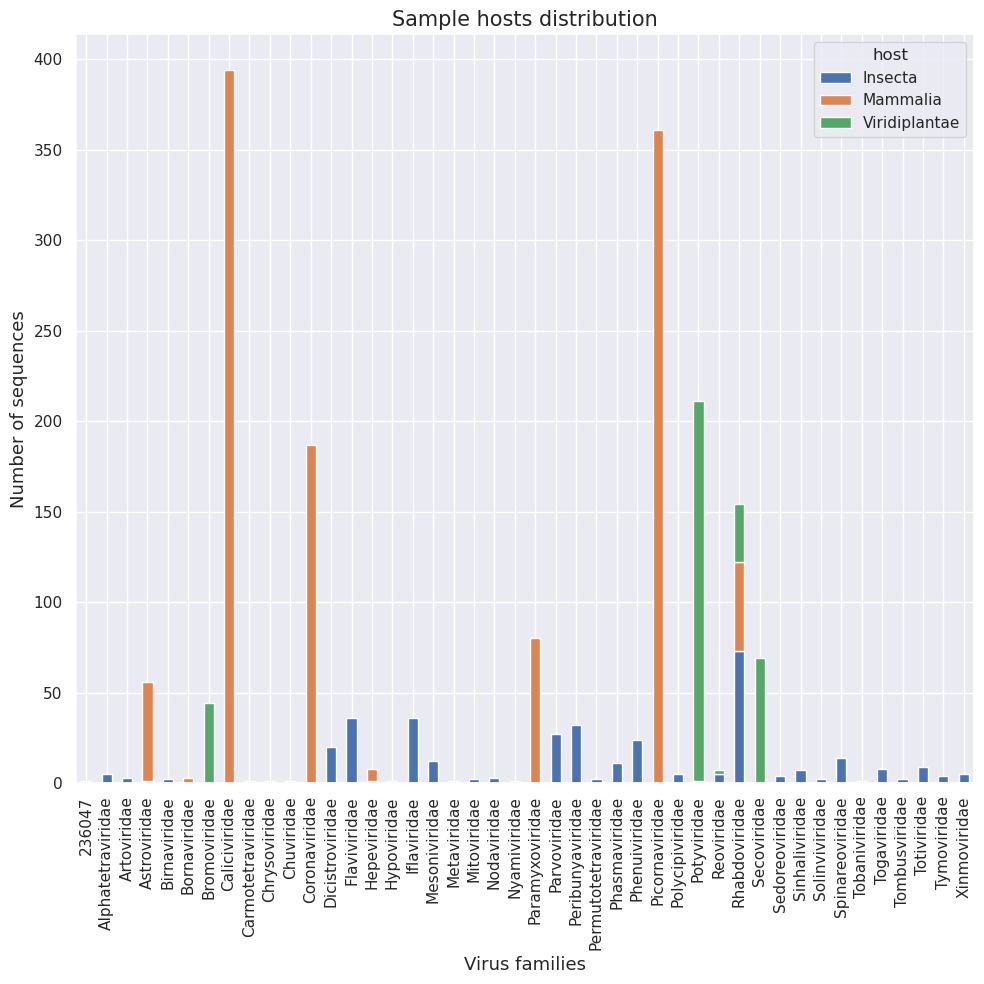

In [142]:
meta_df.groupby(['virus family', 'host']).size().unstack().plot(kind='bar', figsize=(10,10), stacked=True)
plt.xticks(rotation=90, ha='center')
plt.ylabel('Number of sequences', fontsize=13)
plt.xlabel('Virus families', fontsize=13)
plt.title('Sample hosts distribution', fontsize=15)
plt.tight_layout()

# Plots

In [155]:
with open(path+'data.fasta', 'r') as inf:
    tmp1 = list(SeqIO.parse(inf, 'fasta'))

In [159]:
print(len(meta_df['virus family'].unique()), len(meta_df))

44 1857


Coronaviridae 187


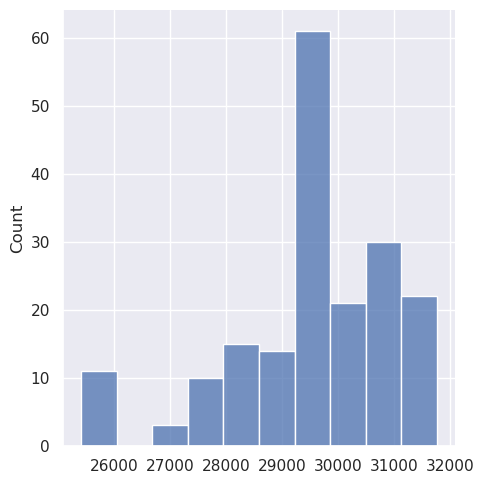

Rhabdoviridae 154


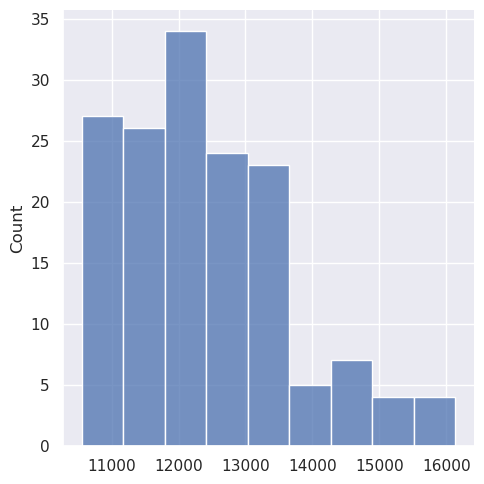

Phasmaviridae 11


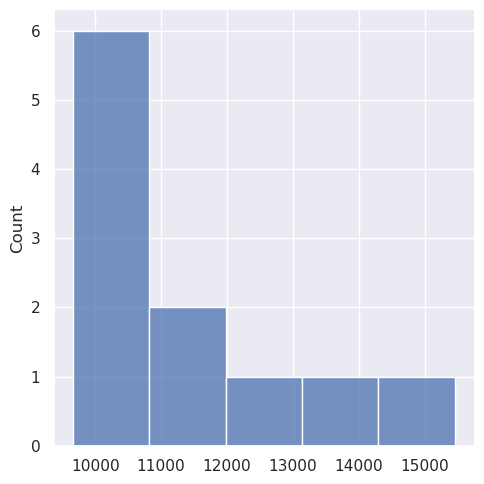

Nodaviridae 3


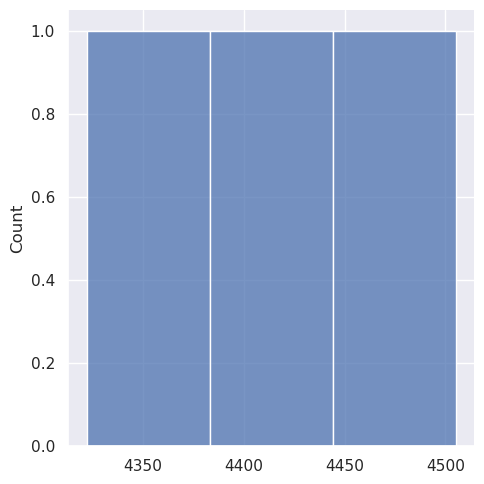

Birnaviridae 2


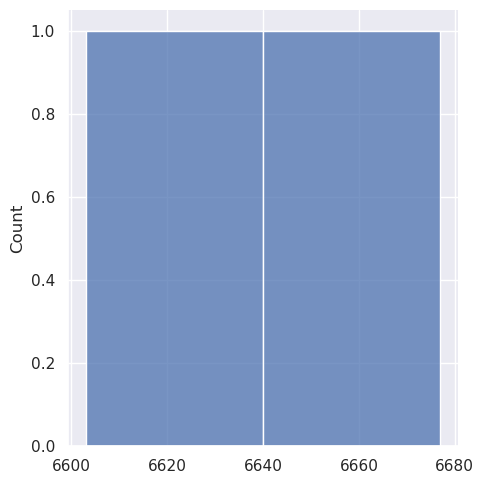

Secoviridae 69


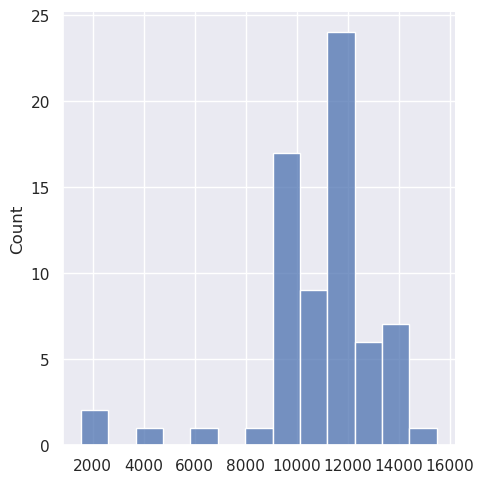

Bromoviridae 44


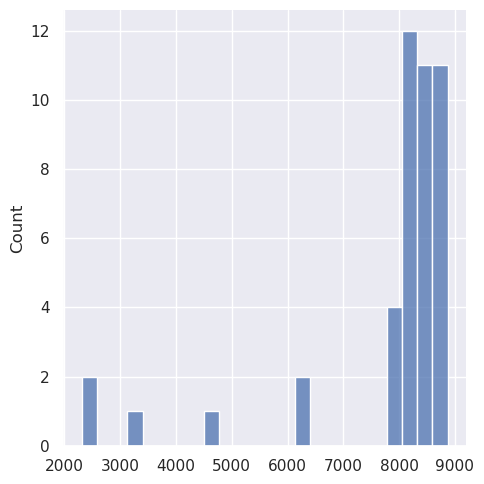

Picornaviridae 361


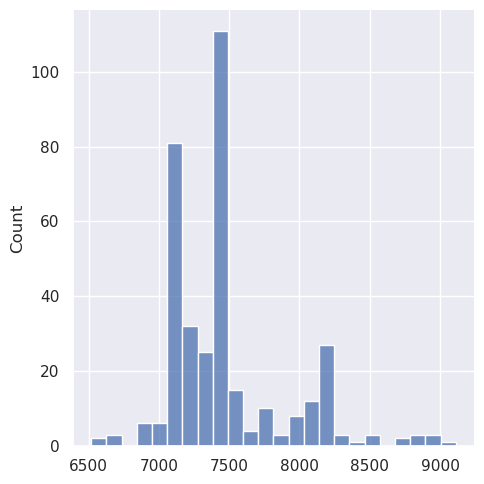

Potyviridae 211


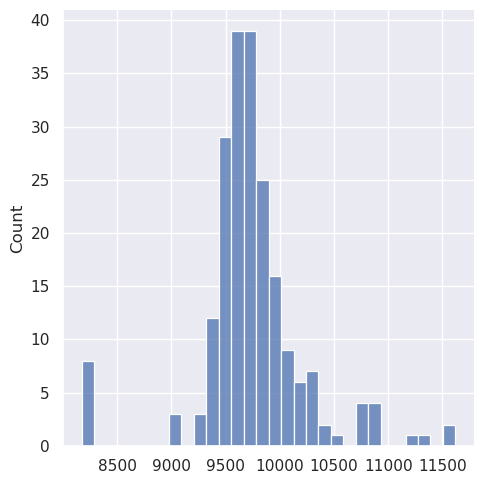

Reoviridae 7


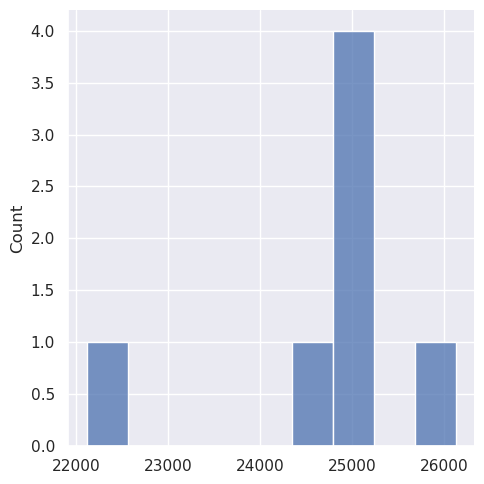

Paramyxoviridae 80


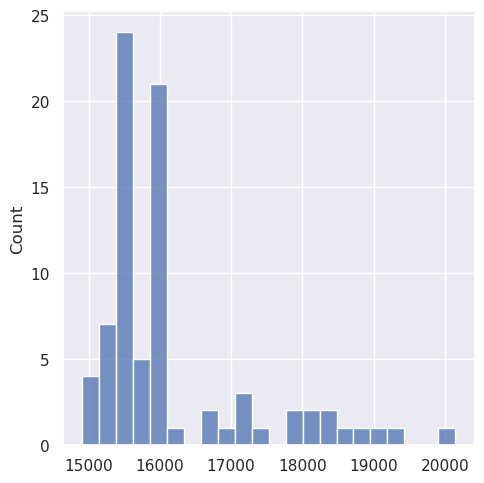

Hepeviridae 8


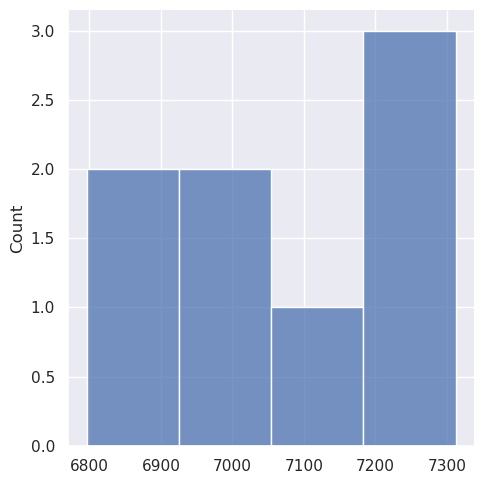

Astroviridae 56


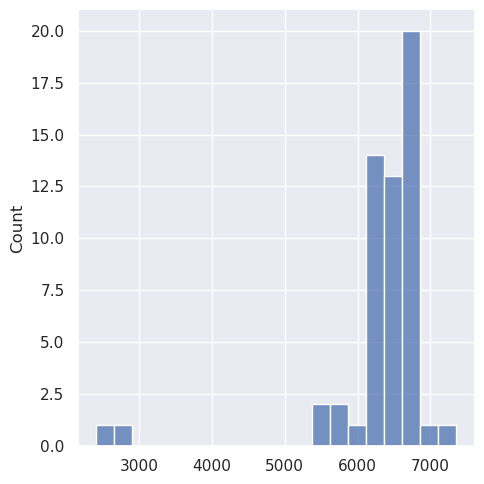

Bornaviridae 3


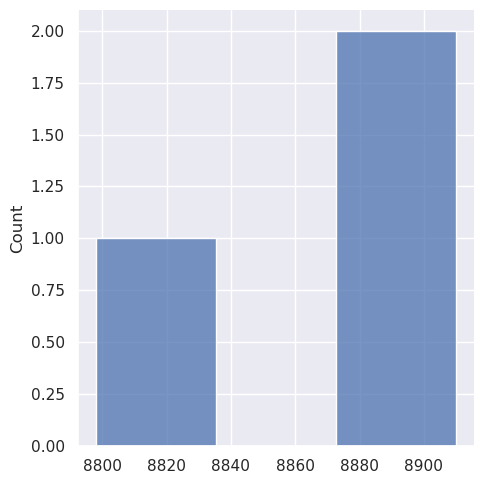

Dicistroviridae 20


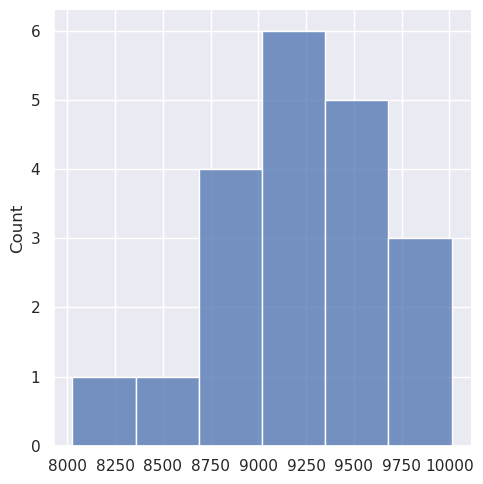

Parvoviridae 27


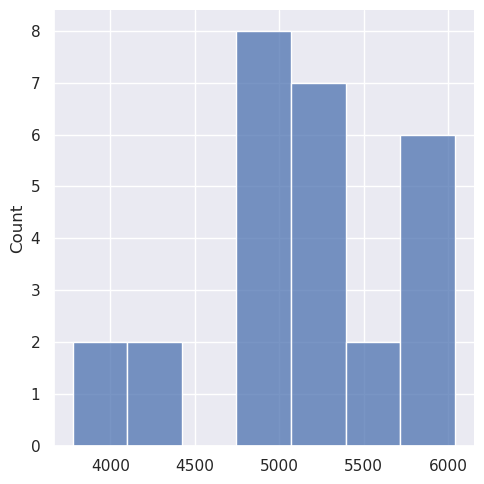

Flaviviridae 36


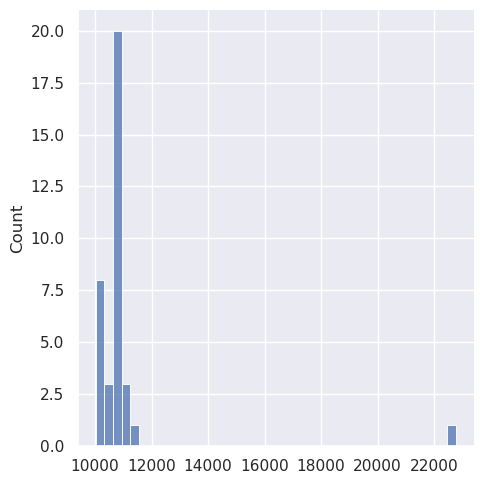

Spinareoviridae 14


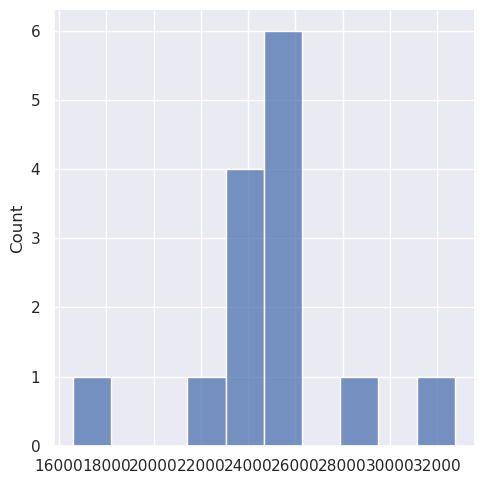

Phenuiviridae 24


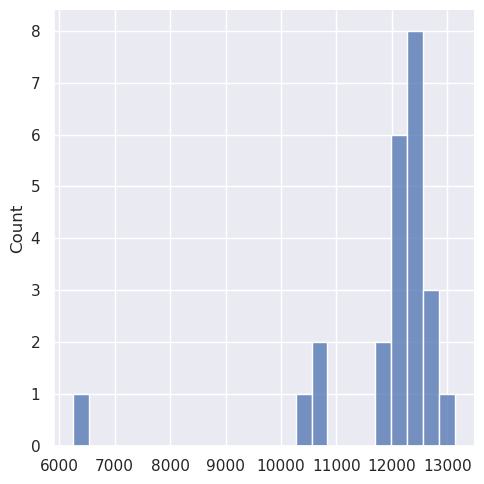

Peribunyaviridae 32


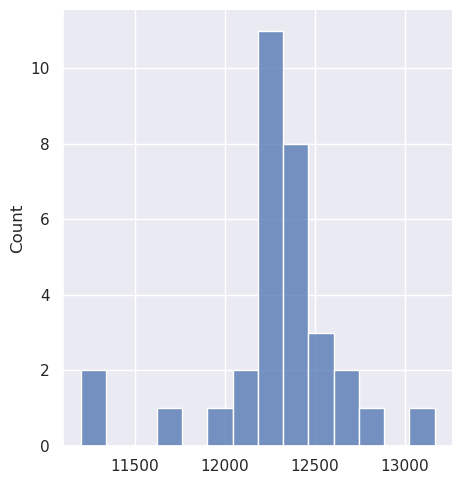

Mesoniviridae 12


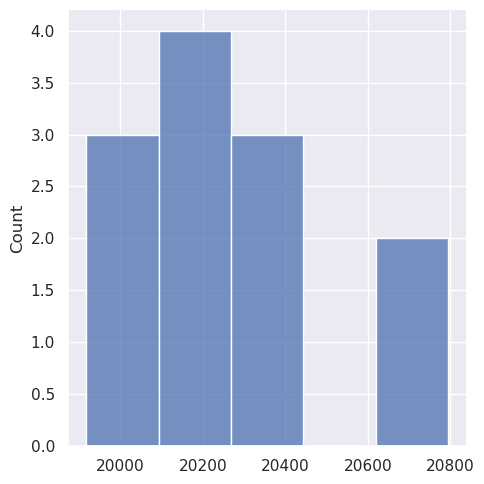

Togaviridae 8


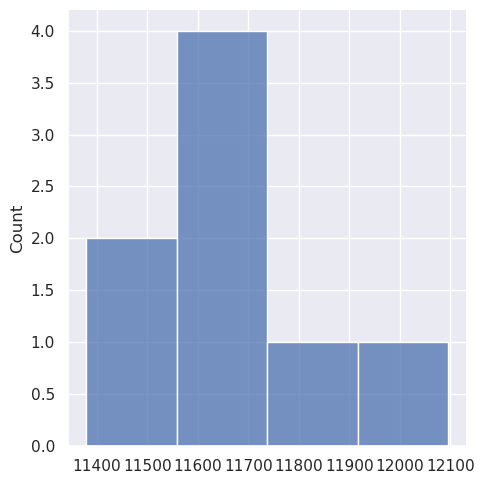

Iflaviridae 36


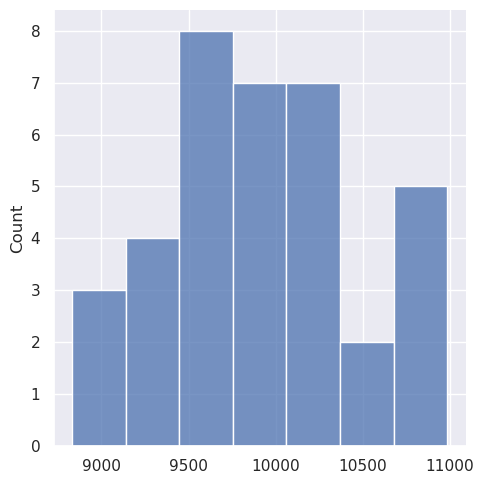

Totiviridae 9


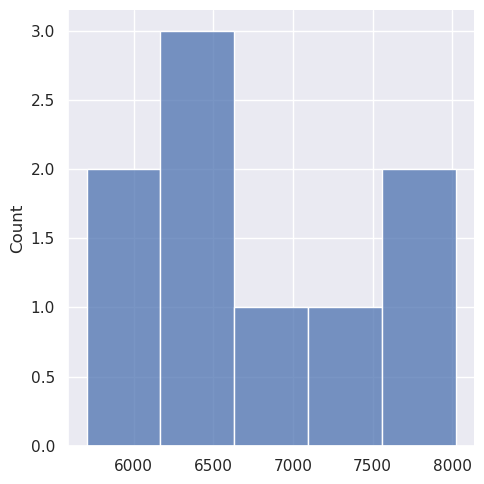

Tymoviridae 4


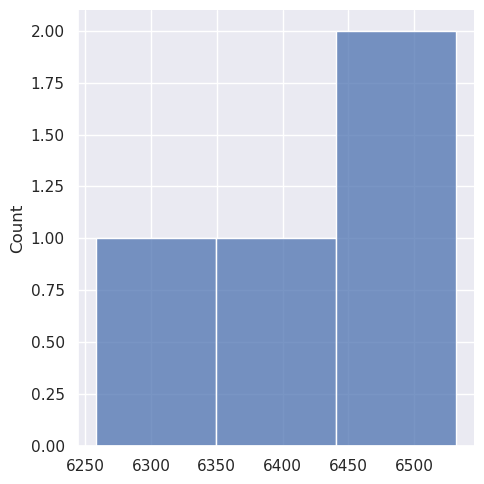

Xinmoviridae 5


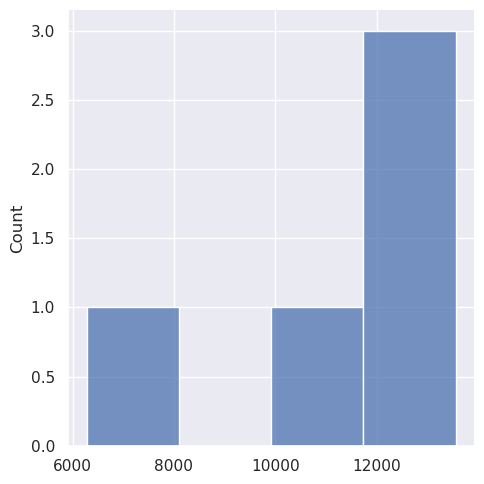

236047 1


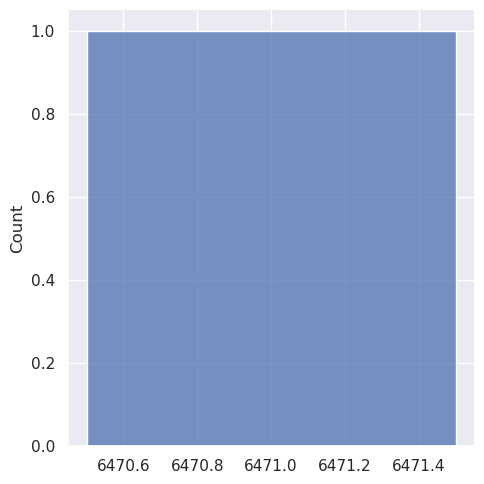

Alphatetraviridae 5


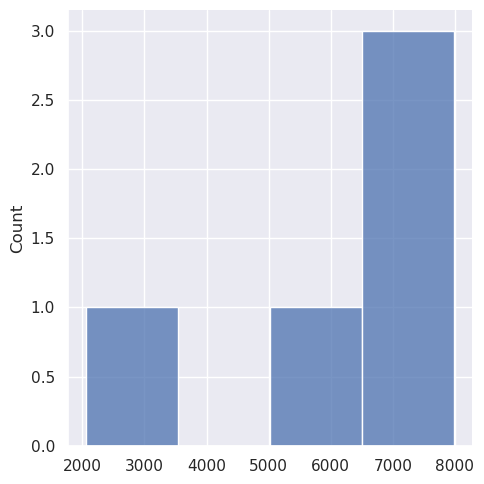

Tombusviridae 2


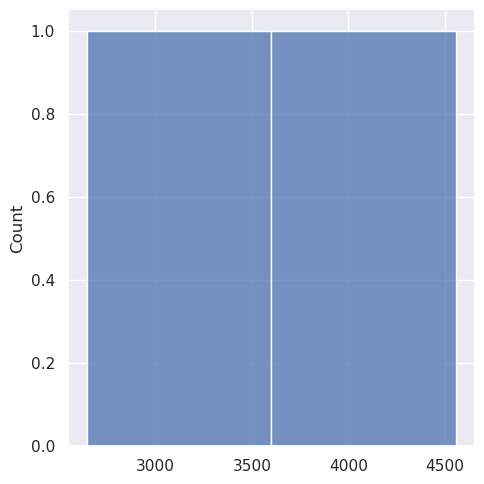

Permutotetraviridae 2


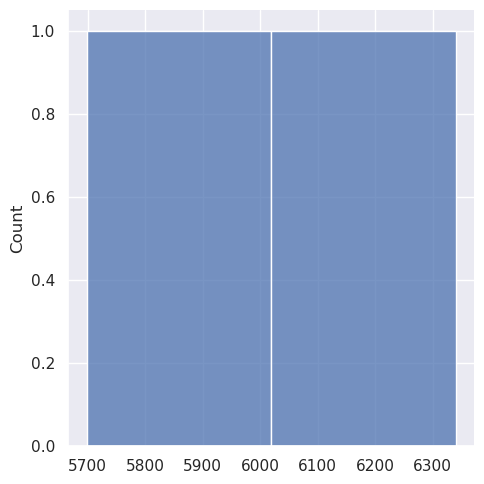

Sedoreoviridae 4


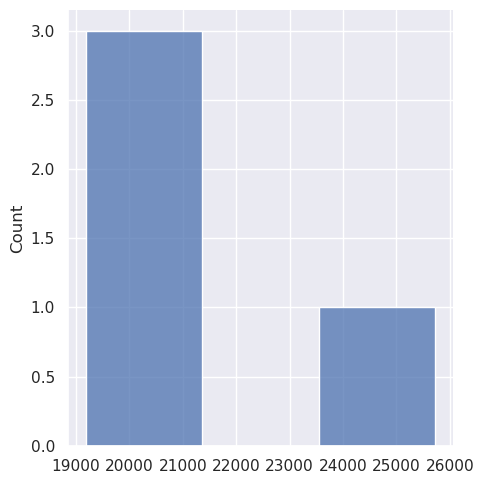

Artoviridae 3


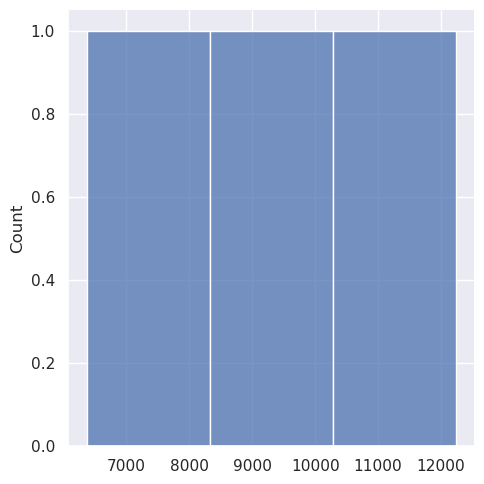

Chuviridae 1


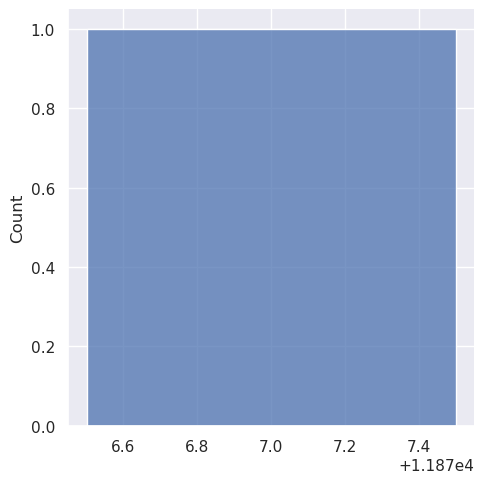

Sinhaliviridae 7


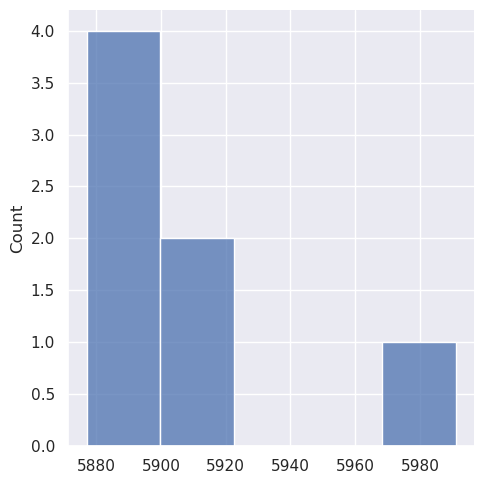

Polycipiviridae 5


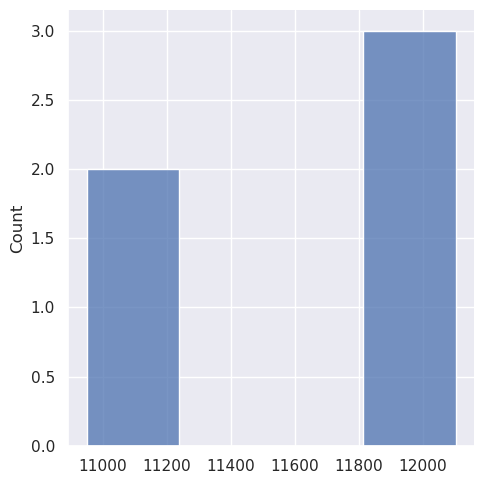

Solinviviridae 2


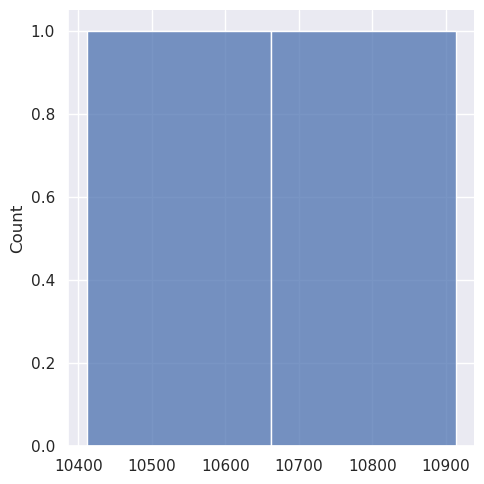

Nyamiviridae 1


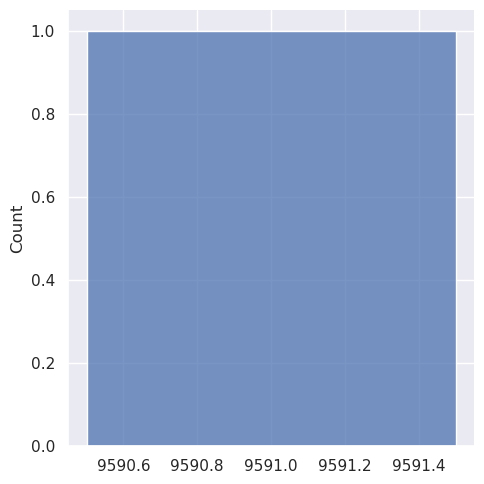

Carmotetraviridae 1


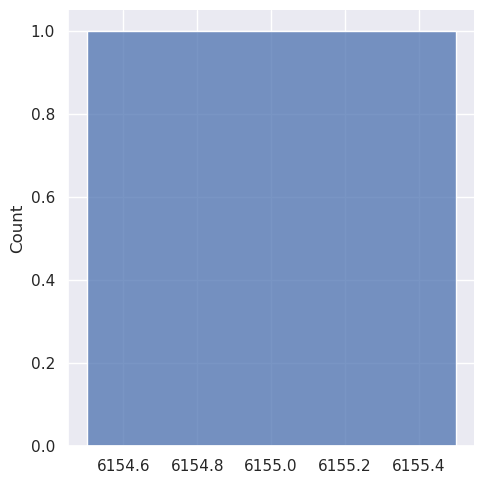

Mitoviridae 2


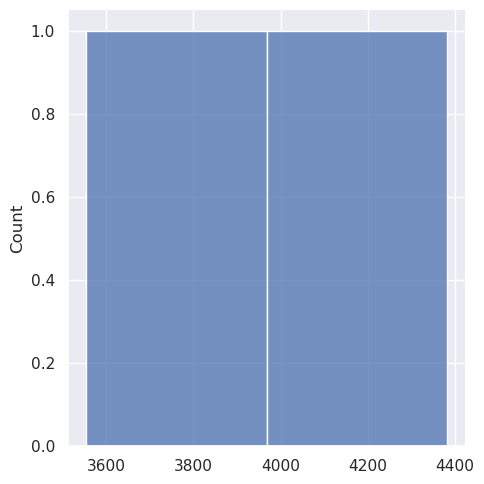

Chrysoviridae 1


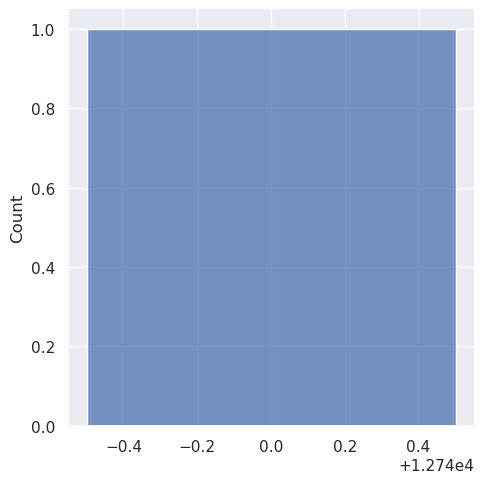

Metaviridae 1


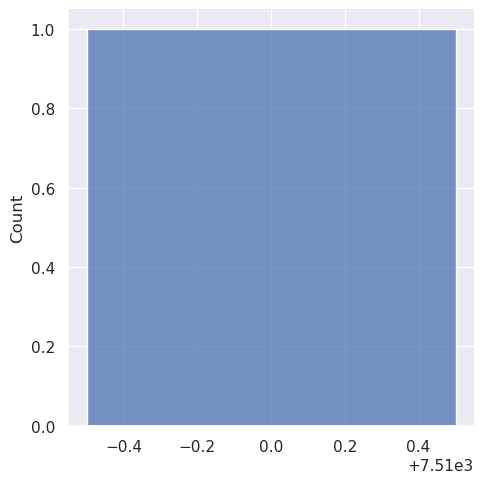

Hypoviridae 1


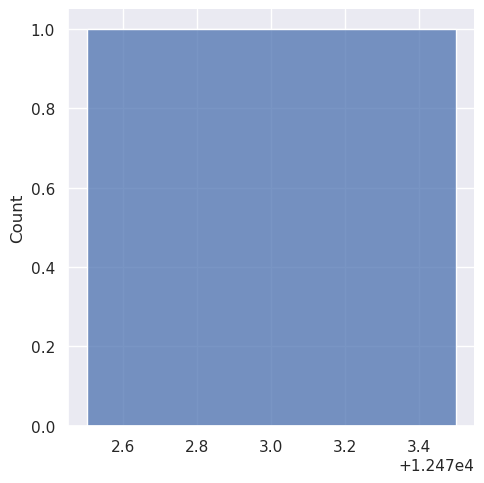

Tobaniviridae 1


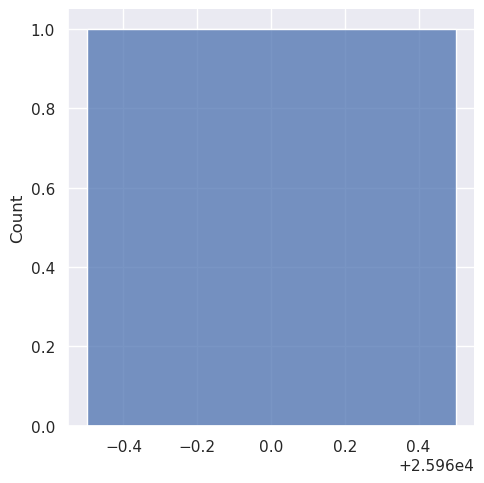

Caliciviridae 394


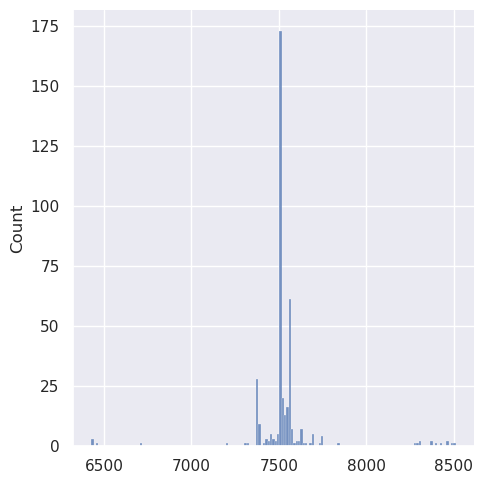

In [160]:
for fam in meta_df['virus family'].unique():
    lst_ids = []
    tmp = meta_df[meta_df['virus family'] == fam].index
    for seq in tmp1:
        if seq.id in tmp:
            lst_ids.append(len(seq.seq))
    print(fam, len(lst_ids))

    sns.displot(lst_ids)
    plt.show()

# Family tests

In [154]:
lst = 'NC_001959'.split(', ')
with open(path+'handcraft.fasta', 'w') as out, open(path+'virushostdb.genomic.fna', 'r') as inf:
    seq_tmp = ''
    for seq in SeqIO.parse(inf, 'fasta'):
        if seq.id in lst:
            if lst.index(seq.id) == 0:
                id_tmp, desc_tmp = seq.id, seq.description
            seq_tmp+=seq.seq
    seq.seq, seq.id, seq.description = seq_tmp, id_tmp, desc_tmp
    SeqIO.write(seq, out, 'fasta')
    print(len(seq.seq))

7654


In [149]:
tmp = meta_df[meta_df['virus family'] == 'Caliciviridae'].index
for seq in tmp1:
    if seq.id in tmp:
        if len(seq.seq) > 10000:
            print(seq.id, len(seq.seq))

NC_029647 22785
NC_039477 22613
NC_001959 30758


# Coronaviridae

In [21]:
tmp = meta_df[meta_df['virus family'] == 'Coronaviridae']
#tmp.to_csv(path+'tmp_corona.tsv', sep='\t', index = 'refseq id')

In [76]:
tmp = meta_df[meta_df['virus family'] == 'Coronaviridae']
print(len(tmp))
with open(path+'data.fasta', 'r') as inf, open(PATH+'Coronaviridae.fasta', 'w') as out:
    for seq in SeqIO.parse(inf, 'fasta'):
        if seq.id in tmp.index:
            SeqIO.write(seq, out, 'fasta')

187


# TMP

Picornaviridae


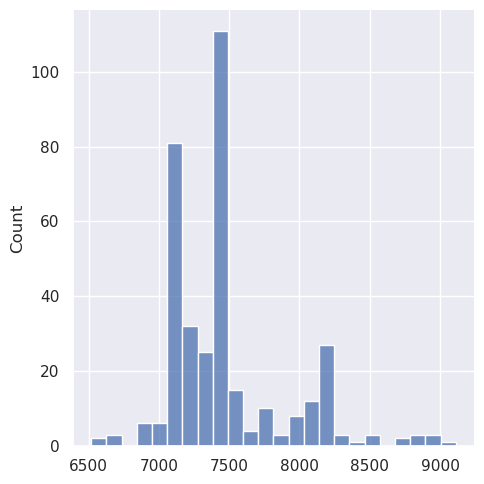

Coronaviridae


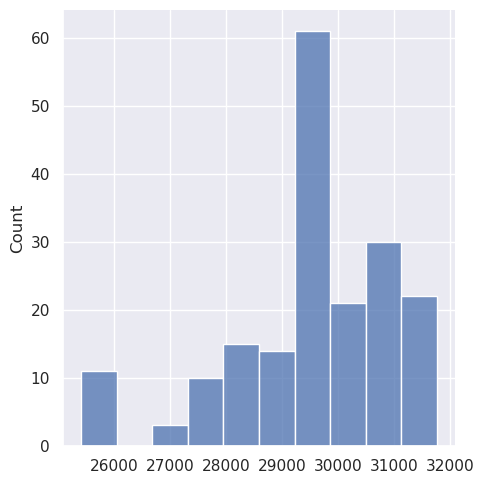

In [81]:
fams = ['Picornaviridae', 'Coronaviridae']
for fam in fams:
    with open(PATH+fam+'.fasta', 'r') as inf:
        tmp = []
        for seq in SeqIO.parse(inf, 'fasta'):
            tmp.append(len(seq.seq))
    print(fam)
    sns.displot(tmp)
    plt.show()

In [53]:
tmp1 = pd.read_csv('/home/parazit/ml_virus_host/data_preparation/not_arbo/not_arbo_table.csv', sep='\t')
tmp2 = pd.read_csv('/home/parazit/ml_virus_host/4_methods/data/data_table.tsv', sep='\t')

In [64]:
pd.concat([pd.DataFrame([tmp1['refseq id'], tmp1['virus tax id']]).T, pd.DataFrame([tmp2['refseq id'], tmp2['virus tax id']]).T]).set_index('virus tax id').drop_duplicates()


,refseq id
virus tax id,
185639,NC_004290
1404345,NC_022564
92444,NC_002548
1293540,NC_021247
224399,NC_004690
...,...
12074,X67706
35293,X77708
103915,X84981


# Old

In [11]:
tmp = meta_df[meta_df['virus family'] == 'Caliciviridae'].index
len(tmp)

394

In [10]:
with open(PATH+'data.fasta', 'r') as data, open('caliciviridae.fasta', 'w') as out:
    for seq in SeqIO.parse(data, 'fasta'):
        if seq.id in tmp:
            SeqIO.write(seq, out, 'fasta')

# Итоги

In [50]:
meta_df = pd.read_csv(path+'data_table.tsv', sep='\t', index_col = 'refseq id')
with open(path+'data.fasta', 'r') as fasta:
    print(len(list(SeqIO.parse(fasta, 'fasta'))) == len(meta_df))

True


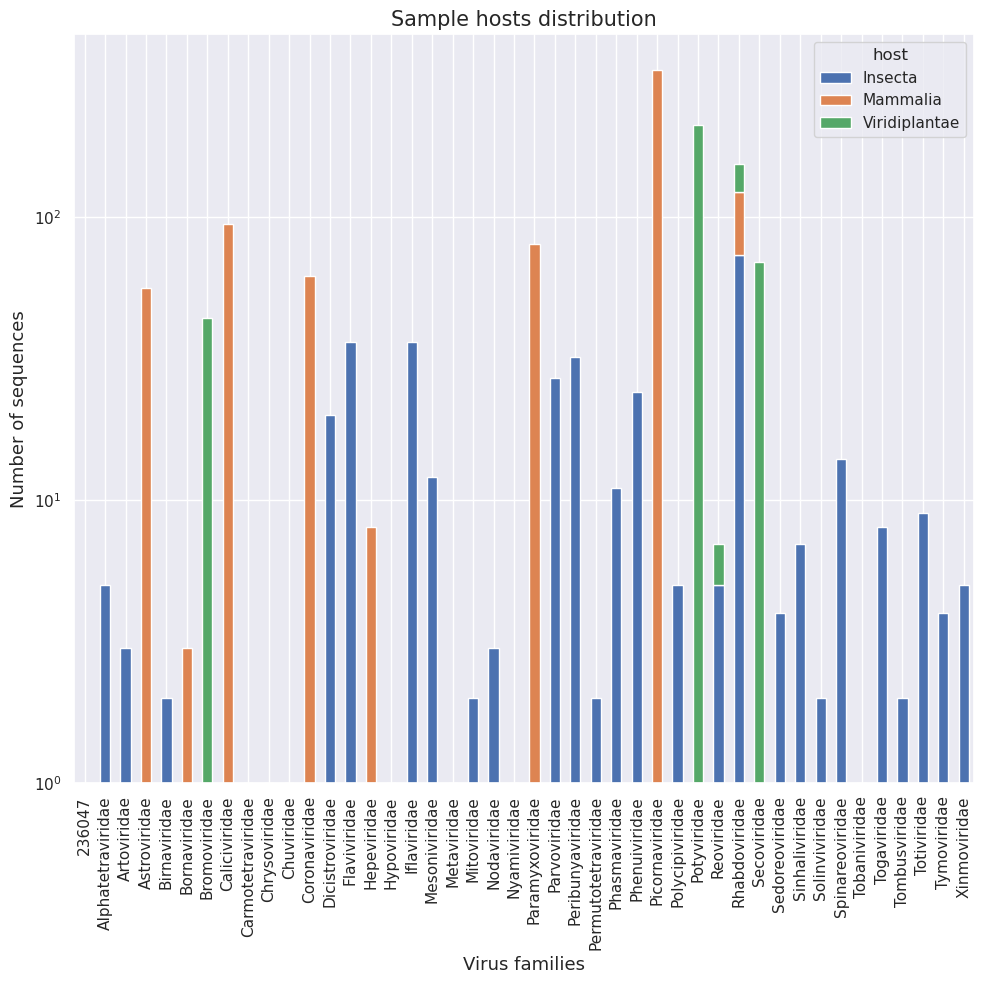

In [55]:
meta_df.groupby(['virus family', 'host']).size().unstack().plot(kind='bar', figsize=(10,10), stacked=True)
plt.xticks(rotation=90, ha='center')
plt.ylabel('Number of sequences', fontsize=13)
plt.xlabel('Virus families', fontsize=13)
plt.yscale("log")
plt.title('Sample hosts distribution', fontsize=15)
plt.tight_layout()
plt.show()

In [54]:
tmp = Counter(meta_df['host'])
print('Mammalia ' +str(round(tmp['Mammalia']/len(meta_df), 1)*100)+'%')
print('Insecta ' +str(round(tmp['Insecta']/len(meta_df), 2)*100)+'%')
print('Viridiplantae ' +str(round(tmp['Viridiplantae']/len(meta_df), 2)*100)+'%')
print('Total virus families '+str(len(meta_df['virus family'].unique())))
print('Total sequences ' + str(len(meta_df)))

Mammalia 50.0%
Insecta 26.0%
Viridiplantae 25.0%
Total virus families 44
Total sequences 1401
